## HPC Lab-6
Name: Tanvi Penumudy

Enroll No: E18CSE187

In [1]:
import multiprocessing 
import os 
import time
import numpy as np
import matplotlib.pyplot as plt

I. Serial Implementation


In [2]:
times = []

In [3]:
import random
X = [random.choices(range(9,999), k=100) for _ in range(100)]
Y = [random.choices(range(9,999), k=100) for _ in range(100)]
result = (np.zeros((100,100))).tolist()

In [4]:
# (int, 100)
%%time
t = time.time()
for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
times.append(time.time()-t)

CPU times: user 320 ms, sys: 1.32 ms, total: 322 ms
Wall time: 322 ms


In [5]:
U = [random.choices(range(9,999), k=250) for _ in range(250)]
V = [random.choices(range(9,999), k=250) for _ in range(250)]
def zeros(rows,cols):
  return [([0]*cols) for i in range(rows)]
r = (np.zeros((250,250))).tolist()

In [6]:
# (int, 250)
%%time
t = time.time()
for i in range(len(U)):
   for j in range(len(V[0])):
       for k in range(len(V)):
           r[i][j] += U[i][k] * V[k][j]
times.append(time.time()-t)

CPU times: user 5.44 s, sys: 0 ns, total: 5.44 s
Wall time: 5.44 s


In [7]:
K = (np.random.uniform(9,999,[100,100])).tolist()
L = (np.random.uniform(9,999,[100,100])).tolist()
res = np.zeros((100,100)).tolist()

In [8]:
# (float, 100)
%%time
t = time.time()
for i in range(len(K)):
   for j in range(len(L[0])):
       for k in range(len(L)):
           res[i][j] += K[i][k] * L[k][j]
times.append(time.time()-t)

CPU times: user 316 ms, sys: 939 µs, total: 317 ms
Wall time: 319 ms


In [71]:
P = (np.random.uniform(9,999,[250,250])).tolist()
QQ = (np.random.uniform(9,999,[250,250])).tolist()
res = np.zeros((250,250)).tolist()

In [10]:
# (float, 250)
%%time
t = time.time()
for i in range(len(P)):
   for j in range(len(QQ[0])):
       for k in range(len(QQ)):
           res[i][j] += P[i][k] * QQ[k][j]
times.append(time.time()-t)

CPU times: user 4.98 s, sys: 2.75 ms, total: 4.99 s
Wall time: 4.99 s


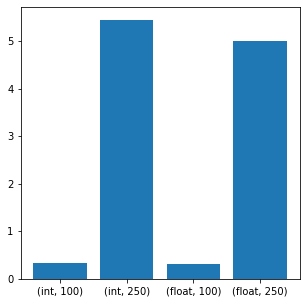

In [11]:
figure = plt.figure(figsize=(5,5))
plt.bar(["(int, 100)","(int, 250)","(float, 100)","(float, 250)"], times)
plt.show()

II. Data Parallel Implementation 

In [12]:
times = []

In [13]:
# (int, 100)
%%time
t = time.time()
def worker1(X, Y, result): 
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
#  return result

def worker2(X, Y, result):
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
#  return result
  
if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 

  # both processes finished 
  worker1(X[:50],Y,np.zeros((50,100)))
  worker2(X[50:],Y,np.zeros((50,100)))
  print("Done!")
times.append(time.time()-t)

Process Process-1:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process Process-2:
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
TypeError: worker1() missing 3 required positional arguments: 'X', 'Y', and 'result'
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 3 required positional arguments: 'X', 'Y', and 'result'


Done!
CPU times: user 918 ms, sys: 12.9 ms, total: 930 ms
Wall time: 960 ms


In [14]:
# (int, 250)
%%time
t = time.time()
def worker1(X, Y, result): 
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
#  return result

def worker2(X, Y, result):
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
#  return result
  
if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 

  # both processes finished 
  worker1(U[:125],V,np.zeros((125,250)))
  worker2(U[125:],V,np.zeros((125,250)))
  print("Done!")
times.append(time.time()-t)

Process Process-3:
Process Process-4:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
TypeError: worker2() missing 3 required positional arguments: 'X', 'Y', and 'result'
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker1() missing 3 required positional arguments: 'X', 'Y', and 'result'


Done!
CPU times: user 13.6 s, sys: 14.9 ms, total: 13.6 s
Wall time: 13.6 s


In [15]:
# (float, 100)
%%time
t = time.time()
def worker1(X, Y, result): 
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
#  return result

def worker2(X, Y, result):
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
#  return result
  
if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 

  # both processes finished 
  worker1(K[:50],L,np.zeros((50,100)))
  worker2(K[50:],L,np.zeros((50,100)))
  print("Done!")
times.append(time.time()-t)

Process Process-5:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process Process-6:
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker1() missing 3 required positional arguments: 'X', 'Y', and 'result'
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 3 required positional arguments: 'X', 'Y', and 'result'


Done!
CPU times: user 732 ms, sys: 11 ms, total: 743 ms
Wall time: 776 ms


In [16]:
# (float, 250)
%%time
t = time.time()
def worker1(X, Y, result): 
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
#  return result

def worker2(X, Y, result):
  for i in range(len(X)):
   for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
#  return result
  
if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 

  # both processes finished 
  worker1(P[:125],QQ,np.zeros((125,250)))
  worker2(P[125:],QQ,np.zeros((125,250)))
  print("Done!")
times.append(time.time()-t)

Process Process-7:
Traceback (most recent call last):
Process Process-8:
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
TypeError: worker1() missing 3 required positional arguments: 'X', 'Y', and 'result'
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 3 required positional arguments: 'X', 'Y', and 'result'


Done!
CPU times: user 10.9 s, sys: 12 ms, total: 10.9 s
Wall time: 10.9 s


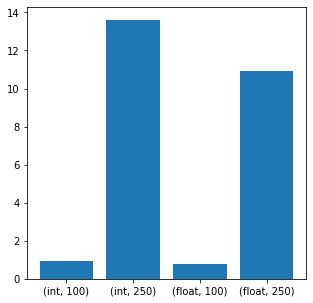

In [17]:
figure = plt.figure(figsize=(5,5))
plt.bar(["(int, 100)","(int, 250)","(float, 100)","(float, 250)"], times)
plt.show()

III. Numpy

In [18]:
times = []

In [19]:
A = np.array(X)
B = np.array(Y)

In [20]:
# (int, 100)
%%time
t = time.time()
np.dot(A,B)
times.append(time.time()-t)

CPU times: user 2.76 ms, sys: 0 ns, total: 2.76 ms
Wall time: 2.2 ms


In [21]:
C = np.array(U)
D = np.array(V)

In [22]:
# (int, 250)
%%time
t = time.time()
np.dot(C,D)
times.append(time.time()-t)

CPU times: user 27.8 ms, sys: 0 ns, total: 27.8 ms
Wall time: 28.5 ms


In [23]:
E = np.array(K)
F = np.array(L)

In [24]:
# (float, 100)
%%time
t = time.time()
np.dot(E,F)
times.append(time.time()-t)

CPU times: user 1.6 ms, sys: 5 ms, total: 6.6 ms
Wall time: 7.11 ms


In [25]:
G = np.array(P)
H = np.array(QQ)

In [26]:
# (float, 250)
%%time
t = time.time()
np.dot(G,H)
times.append(time.time()-t)

CPU times: user 3.34 ms, sys: 1.02 ms, total: 4.36 ms
Wall time: 2.47 ms


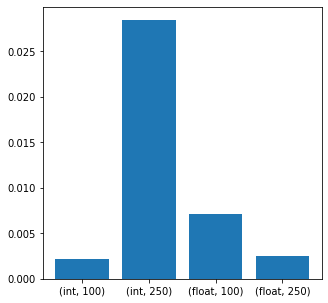

In [27]:
figure = plt.figure(figsize=(5,5))
plt.bar(["(int, 100)","(int, 250)","(float, 100)","(float, 250)"], times)
plt.show()

IV. Scipy


In [28]:
from scipy import linalg

In [29]:
times = []

In [30]:
# (int, 100)
%%time
t = time.time()
A.dot(B)
times.append(time.time()-t)

CPU times: user 2.81 ms, sys: 0 ns, total: 2.81 ms
Wall time: 4.29 ms


In [31]:
# (int, 250)
%%time
t = time.time()
C.dot(D)
times.append(time.time()-t)

CPU times: user 30.1 ms, sys: 0 ns, total: 30.1 ms
Wall time: 33.4 ms


In [32]:
# (float, 100)
%%time
t = time.time()
E.dot(F)
times.append(time.time()-t)

CPU times: user 952 µs, sys: 18 µs, total: 970 µs
Wall time: 760 µs


In [33]:
# (float, 250)
%%time
t = time.time()
G.dot(H)
times.append(time.time()-t)

CPU times: user 3.61 ms, sys: 1.99 ms, total: 5.6 ms
Wall time: 5.62 ms


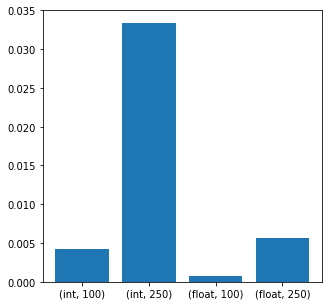

In [34]:
figure = plt.figure(figsize=(5,5))
plt.bar(["(int, 100)","(int, 250)","(float, 100)","(float, 250)"], times)
plt.show()

V. Pandas

In [35]:
import pandas as pd

In [36]:
times = []

In [37]:
A = pd.DataFrame(X)
B = pd.DataFrame(Y)

In [38]:
# (int, 100)
%%time
t = time.time()
A.dot(B)
times.append(time.time()-t)

CPU times: user 3.26 ms, sys: 6 µs, total: 3.26 ms
Wall time: 3.36 ms


In [39]:
C = pd.DataFrame(U)
D = pd.DataFrame(V)

In [40]:
# (int, 250)
%%time
t = time.time()
C.dot(D)
times.append(time.time()-t)

CPU times: user 22.9 ms, sys: 974 µs, total: 23.9 ms
Wall time: 26.3 ms


In [41]:
E = pd.DataFrame(K)
F = pd.DataFrame(L)

In [42]:
# (float, 100)
%%time
t = time.time()
E.dot(F)
times.append(time.time()-t)

CPU times: user 1.55 ms, sys: 5.02 ms, total: 6.57 ms
Wall time: 6.99 ms


In [43]:
G = pd.DataFrame(P)
H = pd.DataFrame(QQ)

In [44]:
# (float, 250)
%%time
t = time.time()
G.dot(H)
times.append(time.time()-t)

CPU times: user 4.25 ms, sys: 6 µs, total: 4.26 ms
Wall time: 2.48 ms


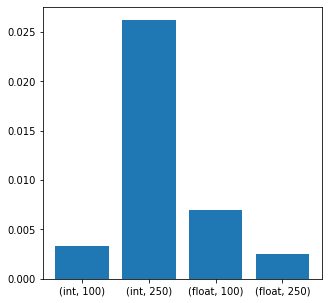

In [45]:
figure = plt.figure(figsize=(5,5))
plt.bar(["(int, 100)","(int, 250)","(float, 100)","(float, 250)"], times)
plt.show()

VI. Sympy (Crashes at Large N)

In [46]:
from sympy import *

In [47]:
times = []

In [48]:
A = Matrix([random.choices(range(9,999), k=50) for _ in range(50)])
B = Matrix([random.choices(range(9,999), k=50) for _ in range(50)])

In [49]:
# (int, 50)
%%time
t = time.time()
A*B
times.append(time.time()-t)

CPU times: user 1.21 s, sys: 23.9 ms, total: 1.23 s
Wall time: 1.23 s


In [50]:
C = Matrix([random.choices(range(9,999), k=100) for _ in range(100)])
D = Matrix([random.choices(range(9,999), k=100) for _ in range(100)])

In [51]:
# (int, 100)
%%time
t = time.time()
C*D
times.append(time.time()-t)

CPU times: user 8.84 s, sys: 136 ms, total: 8.98 s
Wall time: 8.98 s


In [52]:
E = Matrix((np.random.uniform(9,999,[50,50])).tolist())
F = Matrix((np.random.uniform(9,999,[50,50])).tolist())

In [53]:
# (float, 50)
%%time
t = time.time()
E*F
times.append(time.time()-t)

CPU times: user 2.51 s, sys: 14.9 ms, total: 2.53 s
Wall time: 2.53 s


In [54]:
G = Matrix((np.random.uniform(9,999,[100,100])).tolist())
H = Matrix((np.random.uniform(9,999,[100,100])).tolist())

In [55]:
# (float, 100)
%%time
t = time.time()
G*H
times.append(time.time()-t)

CPU times: user 19 s, sys: 18.8 ms, total: 19.1 s
Wall time: 19.1 s


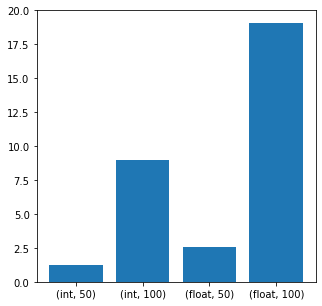

In [56]:
figure = plt.figure(figsize=(5,5))
plt.bar(["(int, 50)","(int, 100)","(float, 50)","(float, 100)"], times)
plt.show()

VII. Numba

In [57]:
import numba
from numba import jit

In [58]:
times = []

In [59]:
@jit('void(int64[:,:],int64[:,:],int64[:,:])')
def numba_mul(matrix1,matrix2,rmatrix):
  for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
      for k in range(len(matrix2)):
        rmatrix[i][j] += matrix1[i][k] * matrix2[k][j]

In [60]:
matrix1 = np.array(X)
matrix2 = np.array(Y)
rmatrix = np.zeros((100,100)).astype(int)

In [61]:
# (int, 100)
%%time
t = time.time()
numba_mul(matrix1,matrix2,rmatrix)
times.append(time.time()-t)

CPU times: user 2.71 ms, sys: 959 µs, total: 3.67 ms
Wall time: 6.61 ms


In [62]:
matrix1 = np.array(U)
matrix2 = np.array(V)
rmatrix = np.zeros((250,250)).astype(int)

In [63]:
# (int, 250)
%%time
t = time.time()
numba_mul(matrix1,matrix2,rmatrix)
times.append(time.time()-t)

CPU times: user 37.7 ms, sys: 0 ns, total: 37.7 ms
Wall time: 37.6 ms


In [68]:
@jit('void(float64[:,:],float64[:,:],float64[:,:])')
def numba_mul(matrix1,matrix2,rmatrix):
  for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
      for k in range(len(matrix2)):
        rmatrix[i][j] += matrix1[i][k] * matrix2[k][j]

matrix1 = np.array(K)
matrix2 = np.array(L)
rmatrix = np.zeros((100,100))

In [65]:
# (float, 100)
%%time
t = time.time()
numba_mul(matrix1,matrix2,rmatrix)
times.append(time.time()-t)

CPU times: user 3.48 ms, sys: 0 ns, total: 3.48 ms
Wall time: 3.39 ms


In [72]:
matrix1 = np.array(P)
matrix2 = np.array(QQ)
rmatrix = np.zeros((250,250))

In [73]:
# (float, 250)
%%time
t = time.time()
numba_mul(matrix1,matrix2,rmatrix)
times.append(time.time()-t)

CPU times: user 53 ms, sys: 1e+03 µs, total: 54 ms
Wall time: 54.2 ms


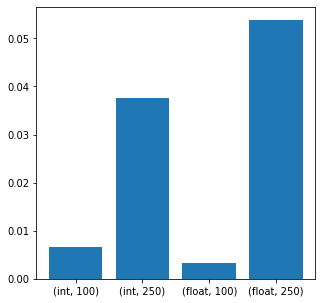

In [74]:
figure = plt.figure(figsize=(5,5))
plt.bar(["(int, 100)","(int, 250)","(float, 100)","(float, 250)"], times)
plt.show()

VIII. Linalg

In [75]:
!pip install linalg

In [76]:
import linalg

In [77]:
times = []

In [78]:
A = linalg.Matrix(X) 
B = linalg.Matrix(Y) 

In [79]:
# (int, 100)
%%time
t = time.time()
A@B
times.append(time.time()-t)

CPU times: user 125 ms, sys: 2.01 ms, total: 128 ms
Wall time: 131 ms


In [80]:
C = linalg.Matrix(U) 
D = linalg.Matrix(V) 

In [81]:
# (int, 250)
%%time
t = time.time()
C@D
times.append(time.time()-t)

CPU times: user 1.8 s, sys: 6 ms, total: 1.8 s
Wall time: 1.8 s


In [82]:
E = linalg.Matrix(K) 
F = linalg.Matrix(L) 

In [83]:
# (float, 100)
%%time
t = time.time()
E@F
times.append(time.time()-t)

CPU times: user 99.8 ms, sys: 975 µs, total: 101 ms
Wall time: 105 ms


In [84]:
G = linalg.Matrix(P) 
H = linalg.Matrix(QQ)

In [85]:
# (float, 250)
%%time
t = time.time()
G@H
times.append(time.time()-t)

CPU times: user 1.58 s, sys: 939 µs, total: 1.58 s
Wall time: 1.59 s


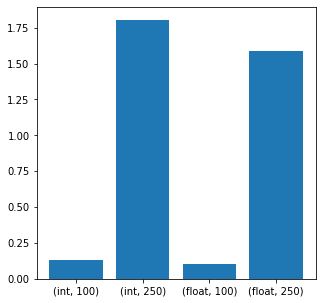

In [86]:
figure = plt.figure(figsize=(5,5))
plt.bar(["(int, 100)","(int, 250)","(float, 100)","(float, 250)"], times)
plt.show()

IX. Pymatrix

In [87]:
!pip install pymatrix

In [88]:
from pymatrix import matrix

In [89]:
times = []

In [90]:
A = matrix(X)
B = matrix(Y)

In [91]:
# (int, 100)
%%time
t = time.time()
A*B
times.append(time.time()-t)

CPU times: user 666 ms, sys: 1.01 ms, total: 667 ms
Wall time: 671 ms


In [92]:
C = matrix(U)
D = matrix(V)

In [93]:
# (int, 250)
%%time
t = time.time()
C*D
times.append(time.time()-t)

CPU times: user 10.4 s, sys: 0 ns, total: 10.4 s
Wall time: 10.4 s


In [94]:
E = matrix(K)
F = matrix(L)

In [95]:
# (float, 100)
%%time
t = time.time()
E*F
times.append(time.time()-t)

CPU times: user 630 ms, sys: 16 µs, total: 630 ms
Wall time: 633 ms


In [96]:
G = matrix(P)
H = matrix(QQ)

In [97]:
# (float, 250)
%%time
t = time.time()
G*H
times.append(time.time()-t)

CPU times: user 9.69 s, sys: 851 µs, total: 9.69 s
Wall time: 9.7 s


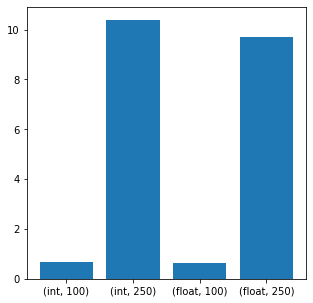

In [98]:
figure = plt.figure(figsize=(5,5))
plt.bar(["(int, 100)","(int, 250)","(float, 100)","(float, 250)"], times)
plt.show()

X. TensorFlow

In [99]:
import tensorflow as tf

In [100]:
times = []

In [101]:
# (int, 100)
%%time
t = time.time()
tf.matmul(X, Y)
times.append(time.time()-t)

CPU times: user 285 ms, sys: 214 ms, total: 499 ms
Wall time: 523 ms


In [102]:
# (int, 250)
%%time
t = time.time()
tf.matmul(U, V)
times.append(time.time()-t)

CPU times: user 53.7 ms, sys: 1.01 ms, total: 54.7 ms
Wall time: 49.4 ms


In [103]:
# (float, 100)
%%time
t = time.time()
tf.matmul(K, L)
times.append(time.time()-t)

CPU times: user 110 ms, sys: 42 ms, total: 152 ms
Wall time: 153 ms


In [104]:
# (float, 250)
%%time
t = time.time()
tf.matmul(P, QQ)
times.append(time.time()-t)

CPU times: user 43 ms, sys: 1.04 ms, total: 44.1 ms
Wall time: 43.9 ms


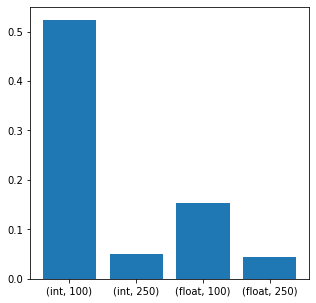

In [105]:
figure = plt.figure(figsize=(5,5))
plt.bar(["(int, 100)","(int, 250)","(float, 100)","(float, 250)"], times)
plt.show()

XI. PyCuda (Crashes at Large N)

In [106]:
!pip install cuda

In [107]:
!pip install pycuda

In [108]:
import pycuda.autoinit
from pycuda import driver, compiler, gpuarray, tools

In [109]:
times = []

In [110]:
kernel_code_template = """
__global__ void MatrixMulKernel(int *a, int *b, int *c)
{
    int tx = threadIdx.x;
    int ty = threadIdx.y;

    // Pvalue is used to store the element of the matrix
    // that is computed by the thread
    float Pvalue = 0;

    // Each thread loads one row of M and one column of N, 
    //   to produce one element of P.
    for (int k = 0; k < %(MATRIX_SIZE)s; ++k) {
        float Aelement = a[ty * %(MATRIX_SIZE)s + k];
        float Belement = b[k * %(MATRIX_SIZE)s + tx];
        Pvalue += Aelement * Belement;
    }

    // Write the matrix to device memory;
    // each thread writes one element
    c[ty * %(MATRIX_SIZE)s + tx] = Pvalue;
}
"""

In [111]:
MATRIX_SIZE = 10

a_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.int64)) 
b_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.int64))
c_gpu = gpuarray.empty((MATRIX_SIZE, MATRIX_SIZE), np.int64)

kernel_code = kernel_code_template % {
    'MATRIX_SIZE': MATRIX_SIZE 
    }

mod = compiler.SourceModule(kernel_code)
matrixmul = mod.get_function("MatrixMulKernel")

In [112]:
# (int, 10)
%%time
t = time.time()
matrixmul(
    a_gpu, b_gpu, 
    c_gpu,
    block = (MATRIX_SIZE, MATRIX_SIZE, 1),
    )
times.append(time.time()-t)

CPU times: user 1.02 ms, sys: 1e+03 ns, total: 1.02 ms
Wall time: 1.03 ms


In [113]:
MATRIX_SIZE = 25

a_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.int64)) 
b_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.int64))
c_gpu = gpuarray.empty((MATRIX_SIZE, MATRIX_SIZE), np.int64)

kernel_code = kernel_code_template % {
    'MATRIX_SIZE': MATRIX_SIZE 
    }

mod = compiler.SourceModule(kernel_code)
matrixmul = mod.get_function("MatrixMulKernel")

In [114]:
# (int, 25)
%%time
t = time.time()
matrixmul(
    a_gpu, b_gpu, 
    c_gpu,
    block = (MATRIX_SIZE, MATRIX_SIZE, 1),
    )
times.append(time.time()-t)

CPU times: user 115 µs, sys: 2 µs, total: 117 µs
Wall time: 122 µs


In [115]:
kernel_code_template = """
__global__ void MatrixMulKernel(float *a, float *b, float *c)
{
    int tx = threadIdx.x;
    int ty = threadIdx.y;

    // Pvalue is used to store the element of the matrix
    // that is computed by the thread
    float Pvalue = 0;

    // Each thread loads one row of M and one column of N, 
    //   to produce one element of P.
    for (int k = 0; k < %(MATRIX_SIZE)s; ++k) {
        float Aelement = a[ty * %(MATRIX_SIZE)s + k];
        float Belement = b[k * %(MATRIX_SIZE)s + tx];
        Pvalue += Aelement * Belement;
    }

    // Write the matrix to device memory;
    // each thread writes one element
    c[ty * %(MATRIX_SIZE)s + tx] = Pvalue;
}
"""

In [116]:
MATRIX_SIZE = 10

a_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.float64)) 
b_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.float64))
c_gpu = gpuarray.empty((MATRIX_SIZE, MATRIX_SIZE), np.float64)

kernel_code = kernel_code_template % {
    'MATRIX_SIZE': MATRIX_SIZE 
    }

mod = compiler.SourceModule(kernel_code)
matrixmul = mod.get_function("MatrixMulKernel")

In [117]:
# (float, 10)
%%time
t = time.time()
matrixmul(
    a_gpu, b_gpu, 
    c_gpu,
    block = (MATRIX_SIZE, MATRIX_SIZE, 1),
    )
times.append(time.time()-t)

CPU times: user 192 µs, sys: 0 ns, total: 192 µs
Wall time: 199 µs


In [118]:
MATRIX_SIZE = 25

a_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.float64)) 
b_gpu = gpuarray.to_gpu(np.random.randn(MATRIX_SIZE, MATRIX_SIZE).astype(np.float64))
c_gpu = gpuarray.empty((MATRIX_SIZE, MATRIX_SIZE), np.float64)

kernel_code = kernel_code_template % {
    'MATRIX_SIZE': MATRIX_SIZE 
    }

mod = compiler.SourceModule(kernel_code)
matrixmul = mod.get_function("MatrixMulKernel")

In [119]:
# (float, 25)
%%time
t = time.time()
matrixmul(
    a_gpu, b_gpu, 
    c_gpu,
    block = (MATRIX_SIZE, MATRIX_SIZE, 1),
    )
times.append(time.time()-t)

CPU times: user 320 µs, sys: 7 µs, total: 327 µs
Wall time: 285 µs


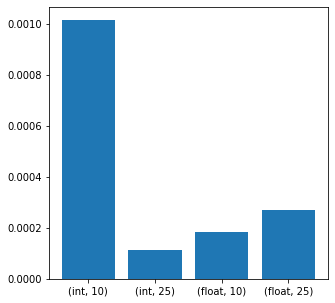

In [120]:
figure = plt.figure(figsize=(5,5))
plt.bar(["(int, 10)","(int, 25)","(float, 10)","(float, 25)"], times)
plt.show()

XII. Theano

In [121]:
import theano
import theano.tensor as T

In [122]:
times = []

In [123]:
x = T.matrix()
y = T.matrix()
dot = T.dot(x, y)
f = theano.function([x,y],[dot])

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


In [124]:
# (int, 100)
%%time
t = time.time()
f(X,Y)
times.append(time.time()-t)

CPU times: user 4.46 ms, sys: 1.01 ms, total: 5.47 ms
Wall time: 5.08 ms


In [125]:
# (int, 250)
%%time
t = time.time()
f(U,V)
times.append(time.time()-t)

CPU times: user 25.2 ms, sys: 5.01 ms, total: 30.2 ms
Wall time: 28.9 ms


In [126]:
# (float, 100)
%%time
t = time.time()
f(K,L)
times.append(time.time()-t)

CPU times: user 2.91 ms, sys: 4.98 ms, total: 7.89 ms
Wall time: 8.01 ms


In [127]:
# (float, 250)
%%time
t = time.time()
f(P,QQ)
times.append(time.time()-t)

CPU times: user 18 ms, sys: 3.03 ms, total: 21 ms
Wall time: 22 ms


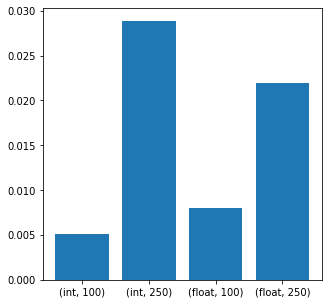

In [128]:
figure = plt.figure(figsize=(5,5))
plt.bar(["(int, 100)","(int, 250)","(float, 100)","(float, 250)"], times)
plt.show()